In [90]:
import pandas as pd
import plotnine as pn
import numpy as np
from wordcloud import WordCloud

In [155]:
books = pd.read_csv('../data/tidy/books.csv')
df = books[books['ownership']=='His']

texts = list(df['category'].values)
texts = [x.split(";") for x in texts if x is not np.nan]

# Some stuff in the columns that I don't want to appear in the wordcloud.
stopwords = [np.nan, 'Protected DAISY', 'In library', 'Accessible book', 
             'Internet Archive Wishlist', 'OverDrive', 'Open Library Staff Picks',
            'Long Now Manual for Civilization','New York Times bestseller']
texts = [item.strip() for t in texts for item in t]
texts = [x for x in texts if x not in stopwords]

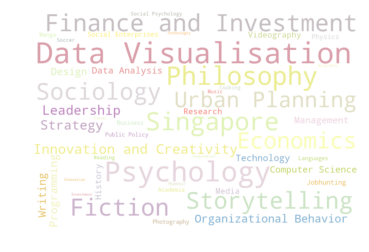

In [156]:
from palettable.colorbrewer.qualitative import Set3_12

# Wordcloud settings
wc = WordCloud(width=1080,height=720,max_words=50,
               background_color='white', colormap=Set3_12.mpl_colormap)

# Generate word cloud
wc.generate_from_frequencies(pd.Series(texts).value_counts())

# Save to file
wc.to_file('test.png')

# Display the generated image
import matplotlib.pyplot as plt
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()